## Import Packages

In [2]:
import pandas as pd
import pytz
import numpy as np
import yfinance as yf
from datetime import datetime, timezone
import quantstats as qs
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import kendalltau
from datetime import timedelta

## Execute Functions

[*********************100%***********************]  1 of 1 completed
-------------------------------------------------------------------------------------------------
[Timestamp('2008-08-01 00:00:00'), Timestamp('2009-07-01 00:00:00'), Timestamp('2011-11-01 00:00:00'), Timestamp('2013-02-01 00:00:00'), Timestamp('2014-08-01 00:00:00'), Timestamp('2015-06-01 00:00:00'), Timestamp('2015-07-01 00:00:00'), Timestamp('2016-02-01 00:00:00'), Timestamp('2016-03-01 00:00:00'), Timestamp('2017-02-01 00:00:00'), Timestamp('2017-03-01 00:00:00'), Timestamp('2017-08-01 00:00:00'), Timestamp('2019-02-01 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2020-06-01 00:00:00'), Timestamp('2020-07-01 00:00:00')]
-------------------------------------------------------------------------------------------------
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  

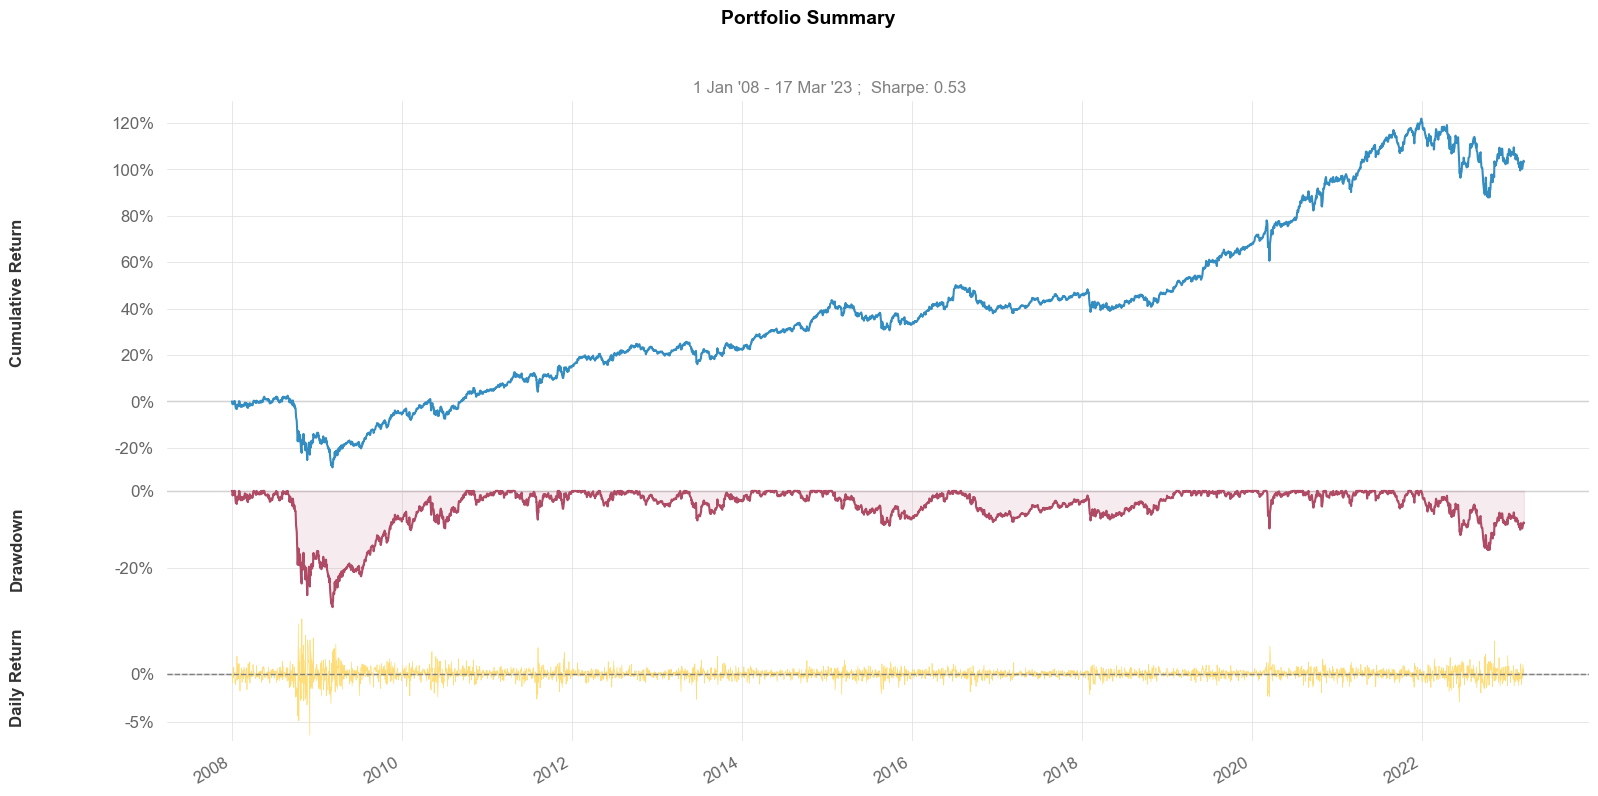

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2008-01-02  2008-01-02
End Period                 2023-03-17  2023-03-17
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          103.39%     169.09%
CAGR﹪                     4.78%       6.72%

Sharpe                     0.53        0.42
Prob. Sharpe Ratio         97.96%      94.8%
Smart Sharpe               0.52        0.41
Sortino                    0.74        0.58
Smart Sortino              0.73        0.58
Sortino/√2                 0.52        0.41
Smart Sortino/√2           0.52        0.41
Omega                      1.11        1.11

Max Drawdown               -30.18%     -53.0%
Longest DD Days            946         1715
Volatility (ann.)          9.77%       20.74%
R^2                        0.5         0.5
Information Ratio          -0.01       -0.01
Calmar                     0.16        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-08-29,2009-03-09,2010-10-05,767,-30.179707,-28.478877
2,2022-01-03,2022-10-14,2023-03-17,438,-15.321985,-14.803286
3,2020-03-09,2020-03-18,2020-06-29,112,-9.764451,-8.616696
4,2015-01-23,2015-09-28,2016-06-08,502,-9.074014,-8.679934
5,2016-07-11,2016-12-16,2019-02-12,946,-8.096801,-7.684341


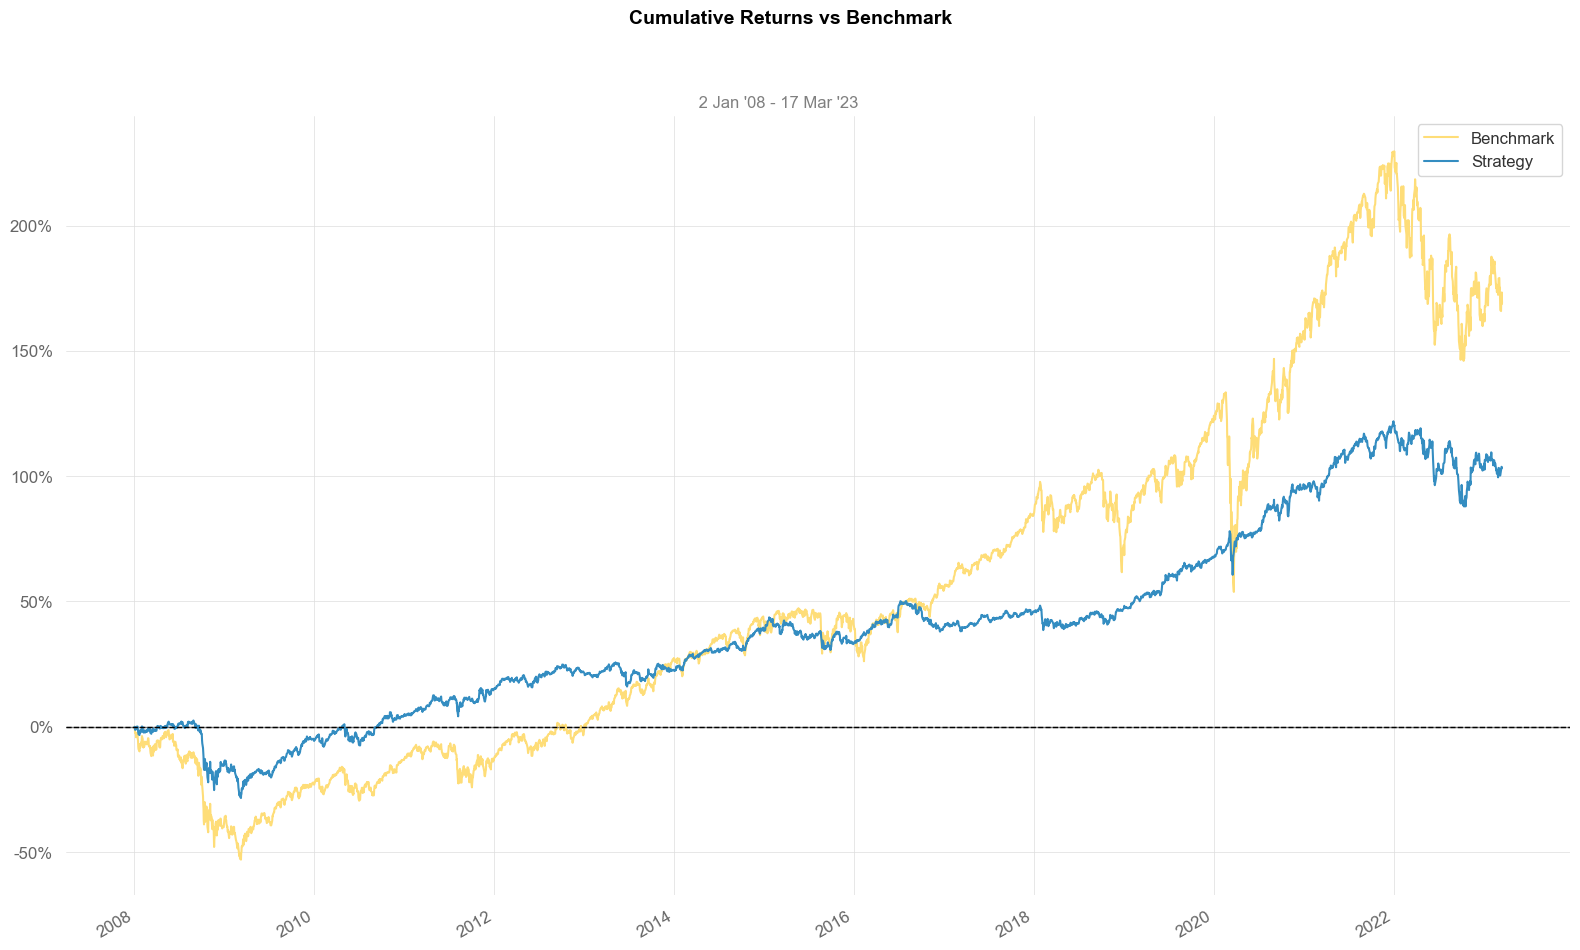

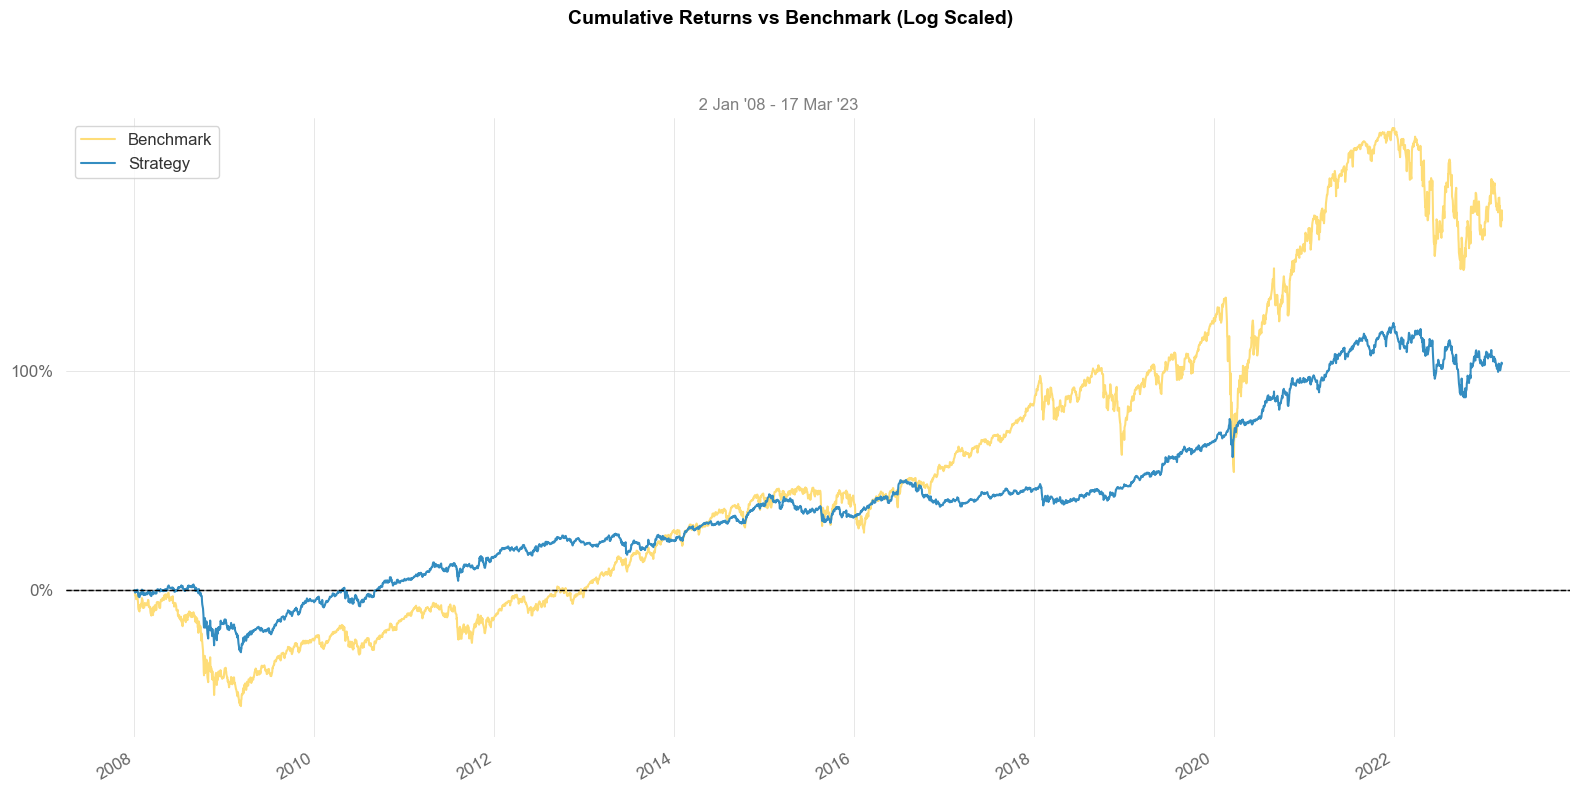

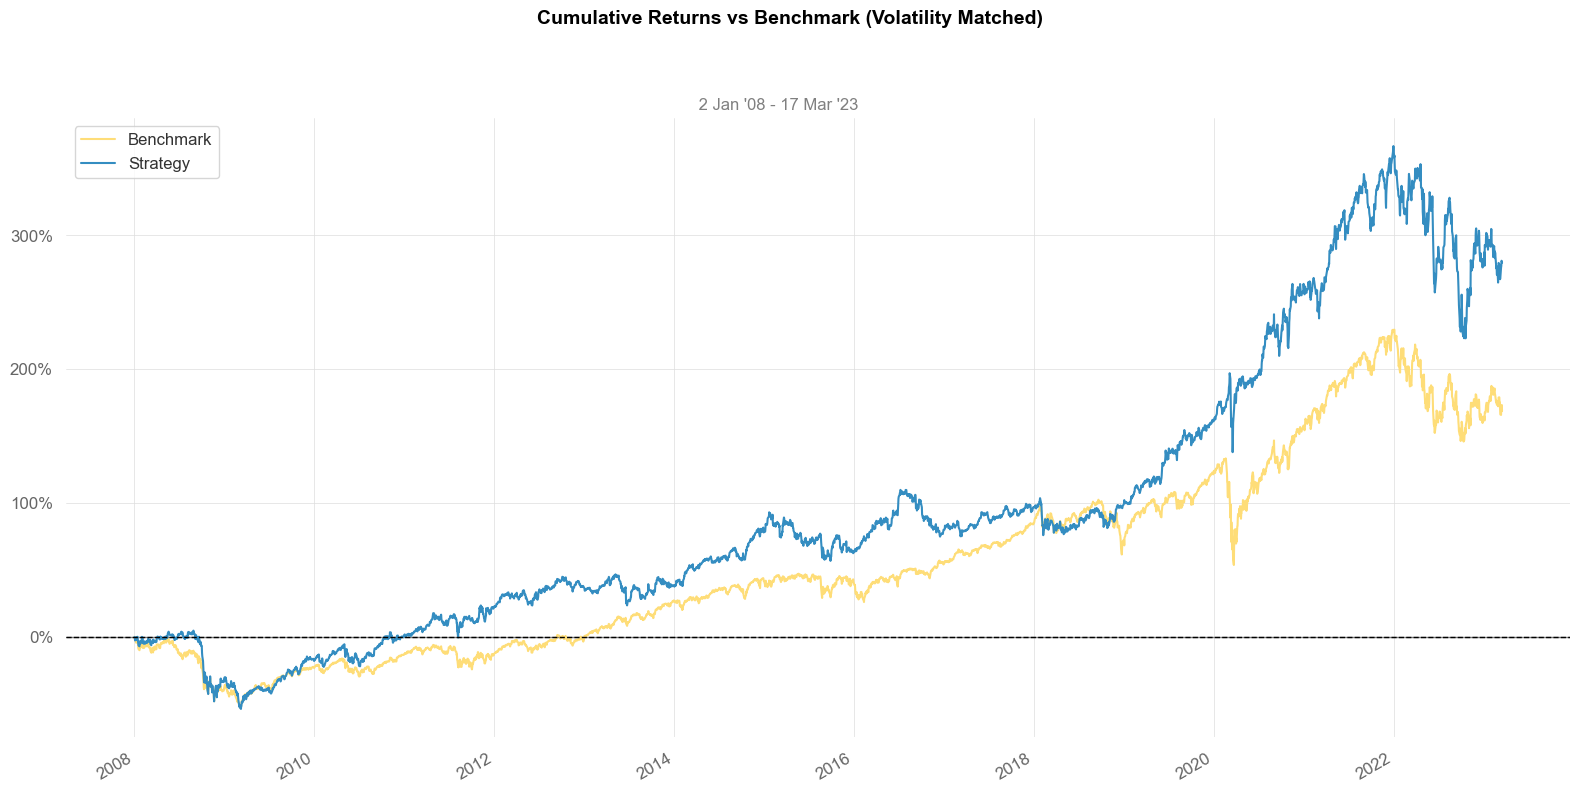

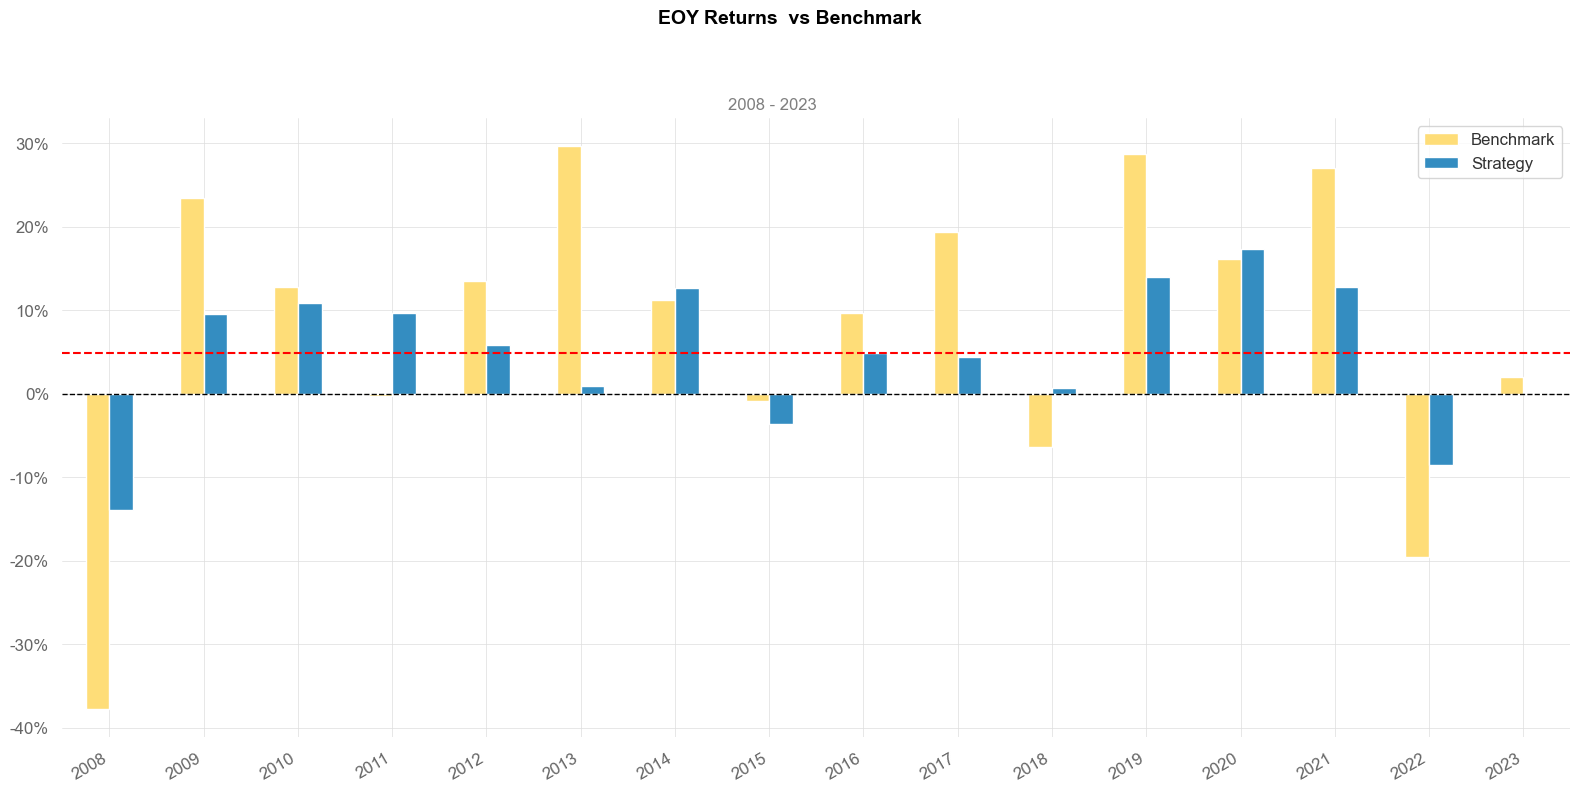

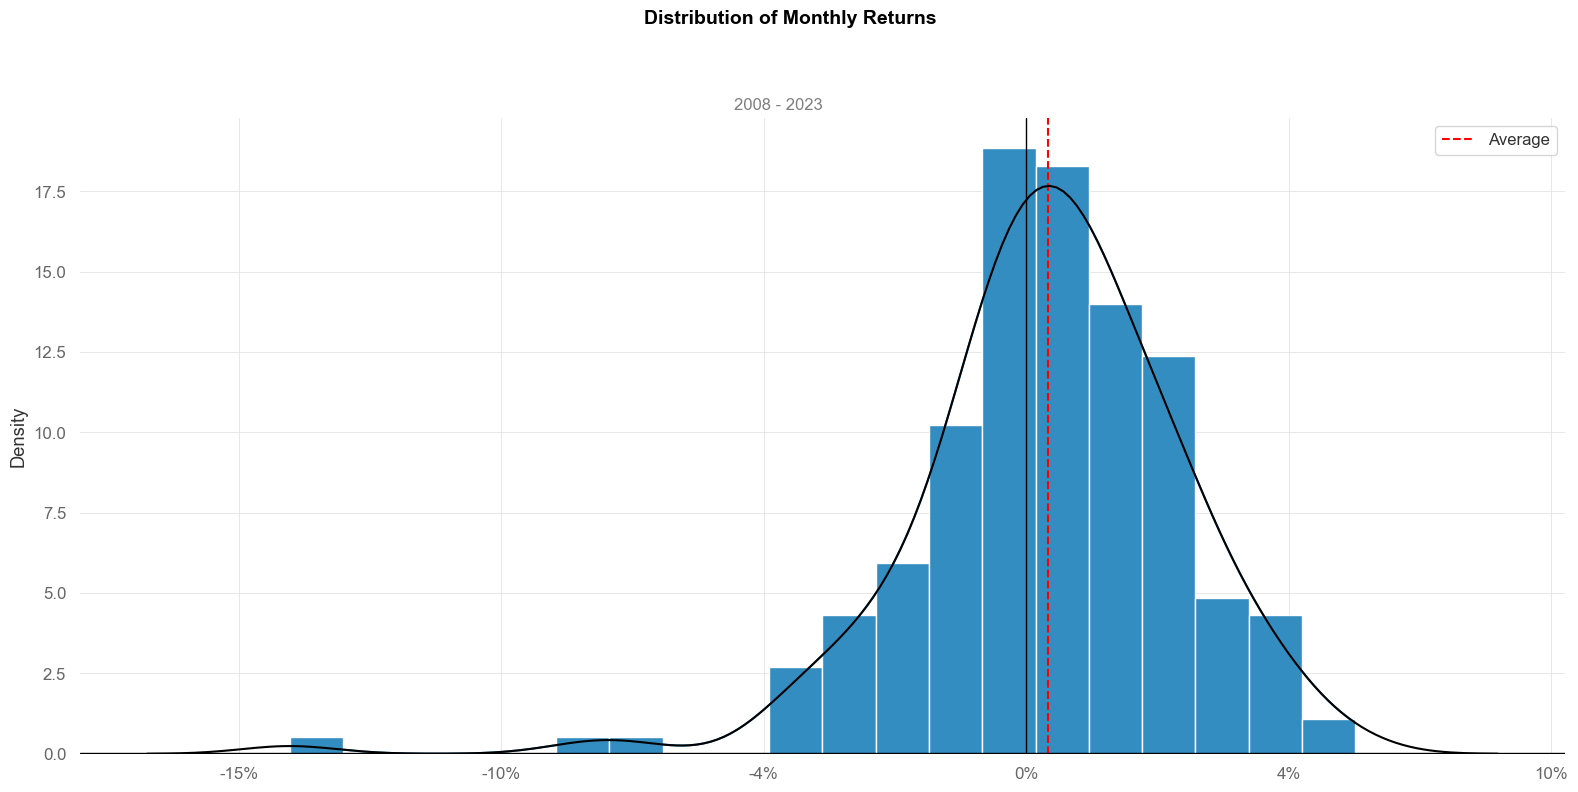

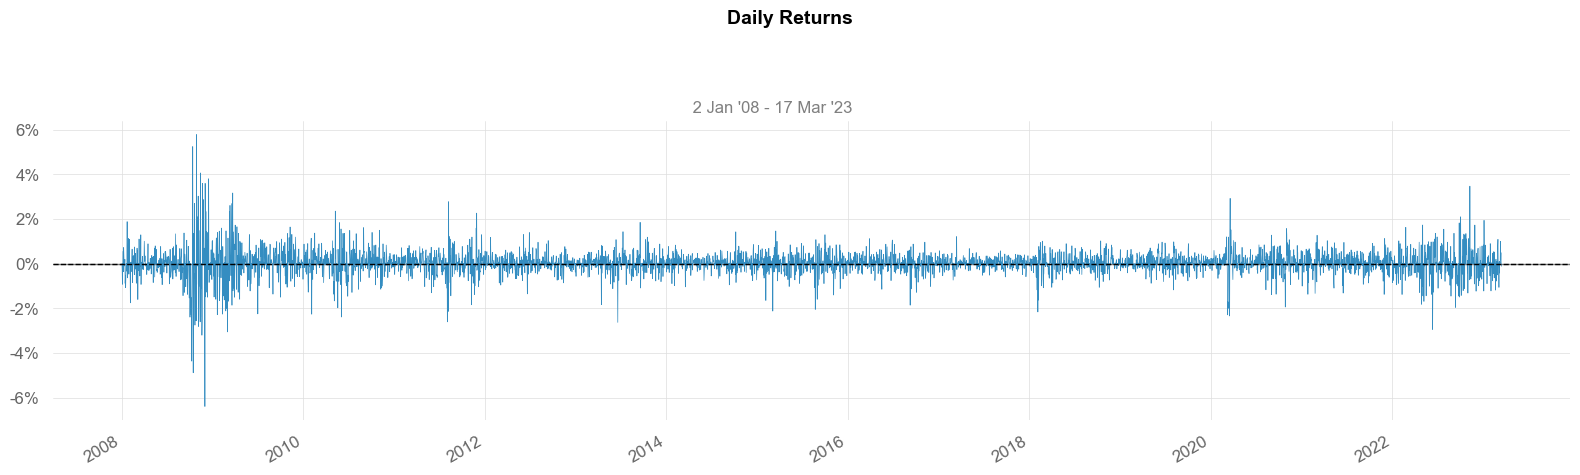

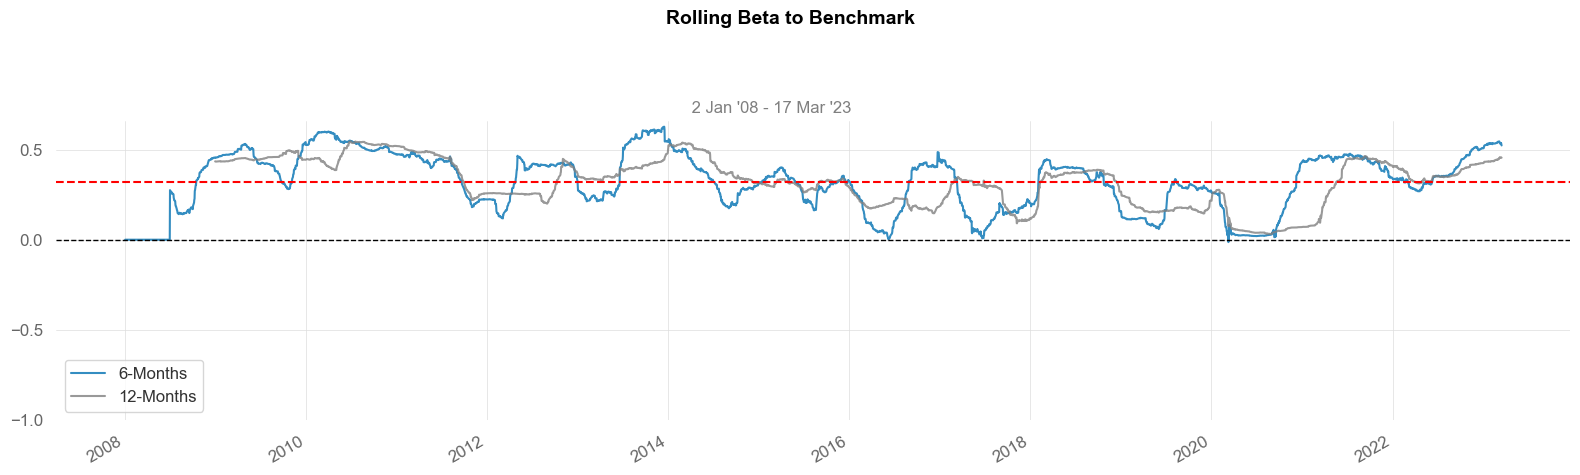

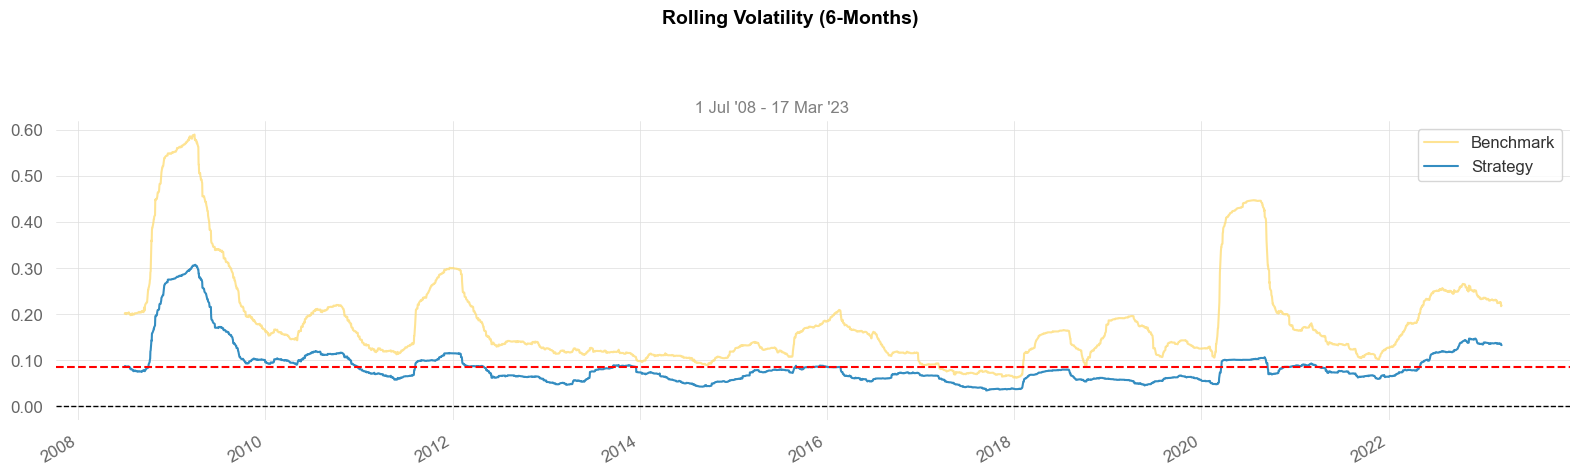

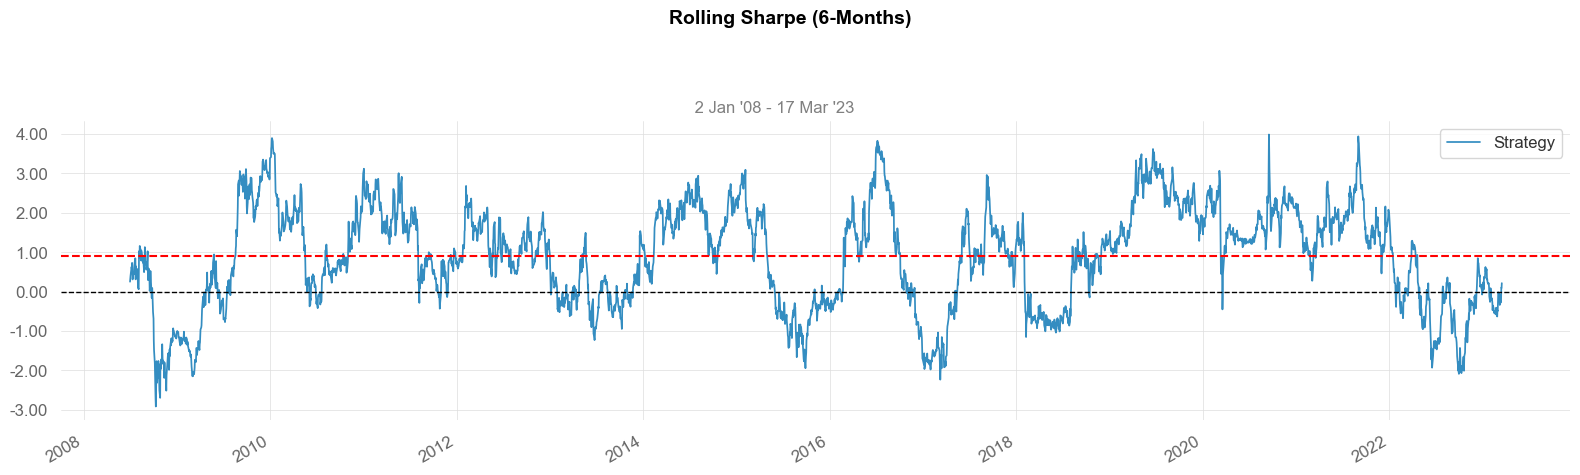

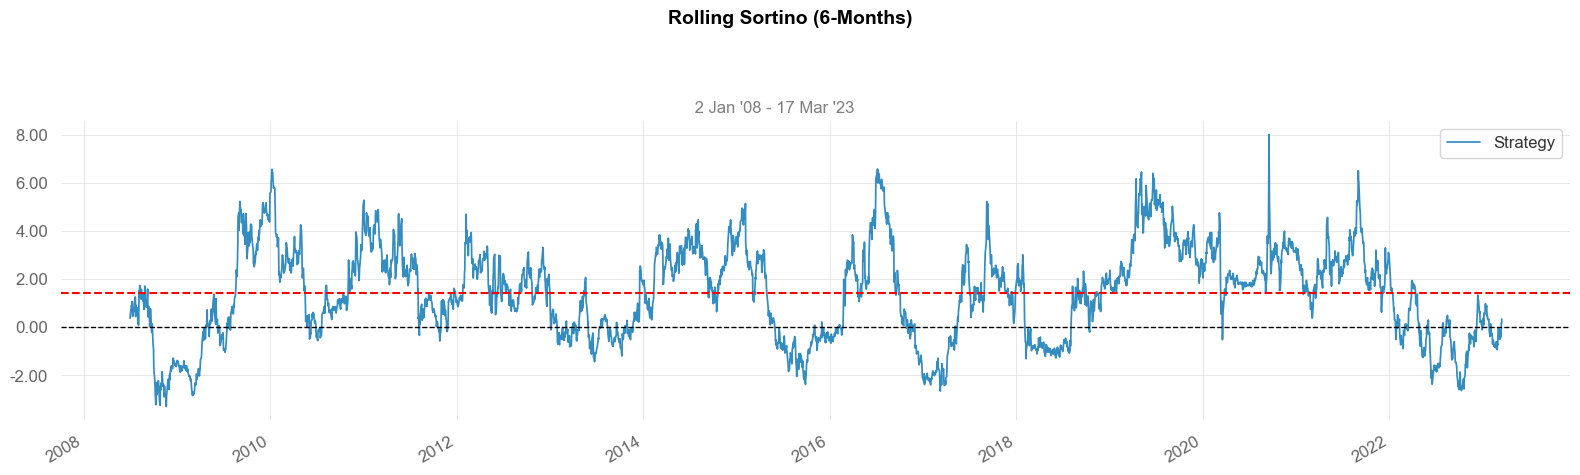

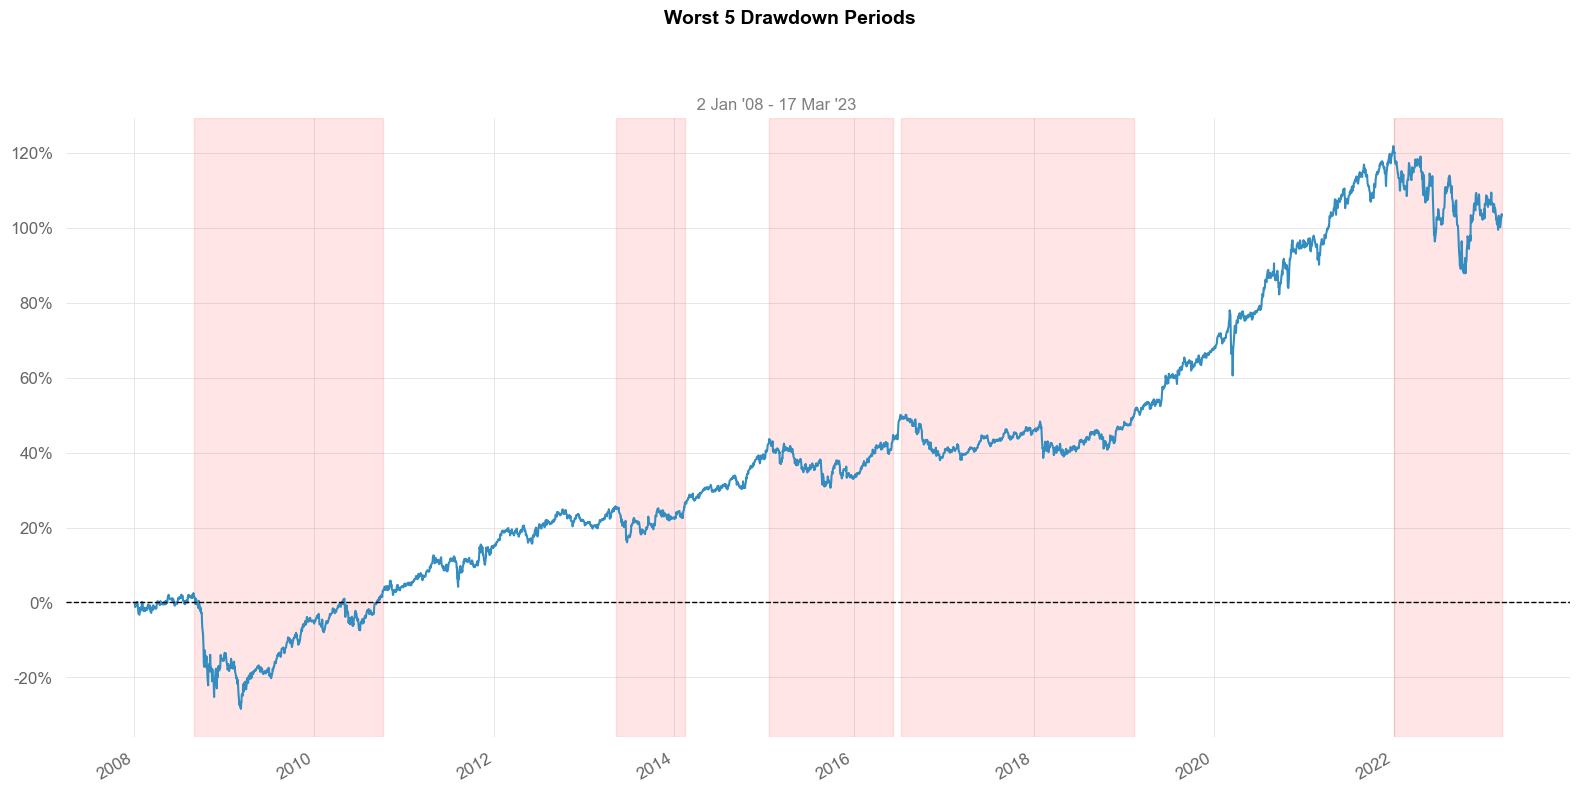

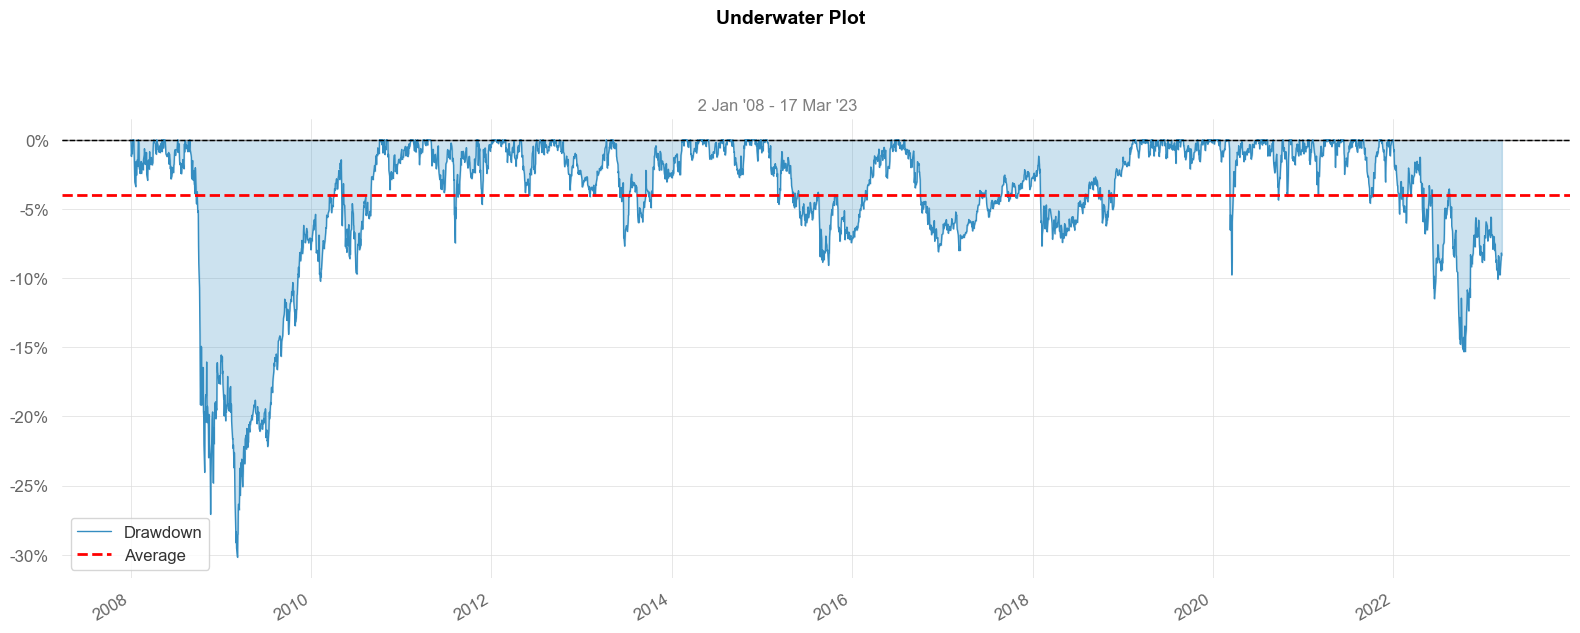

C:\Users\weigf\anaconda3\envs\quantResearch\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


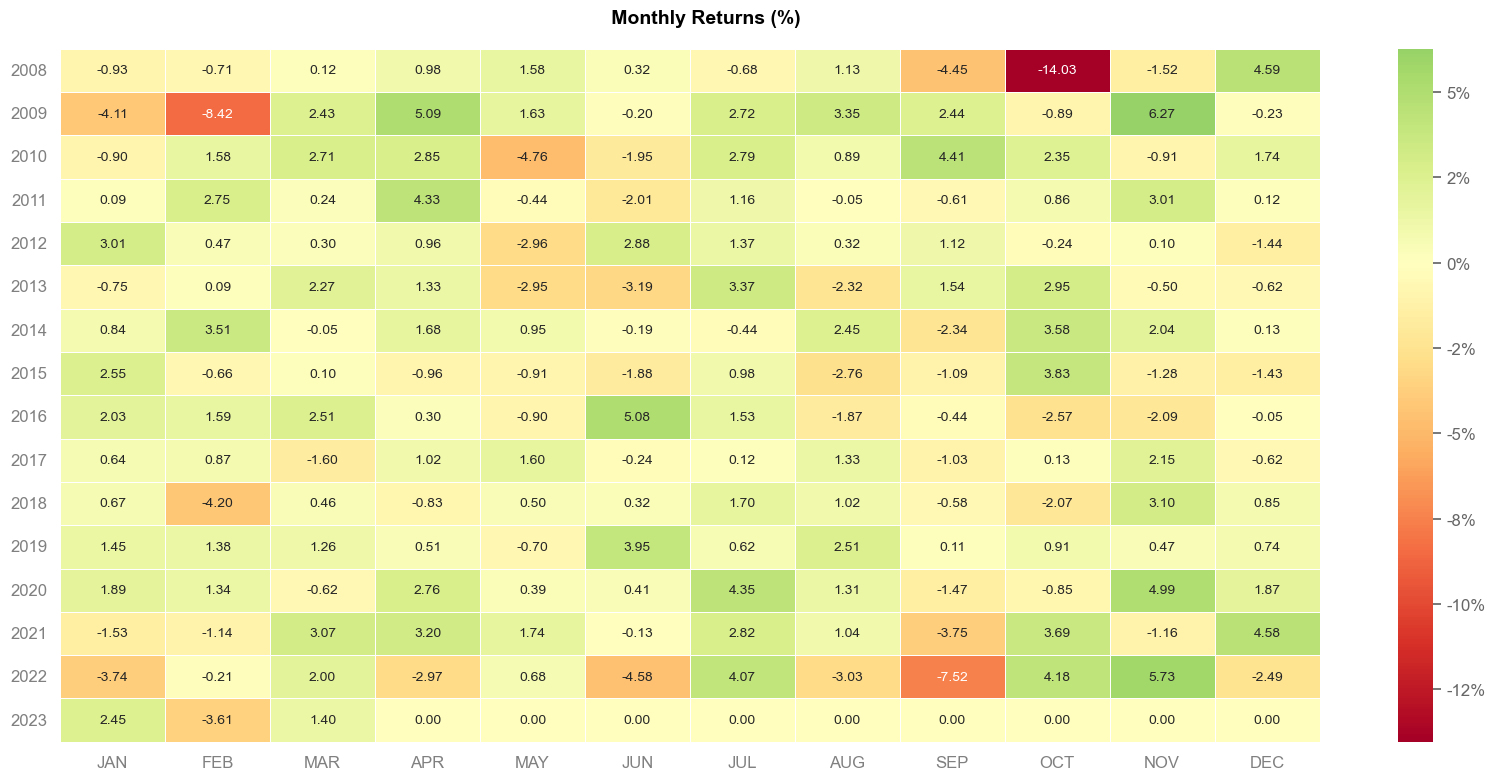

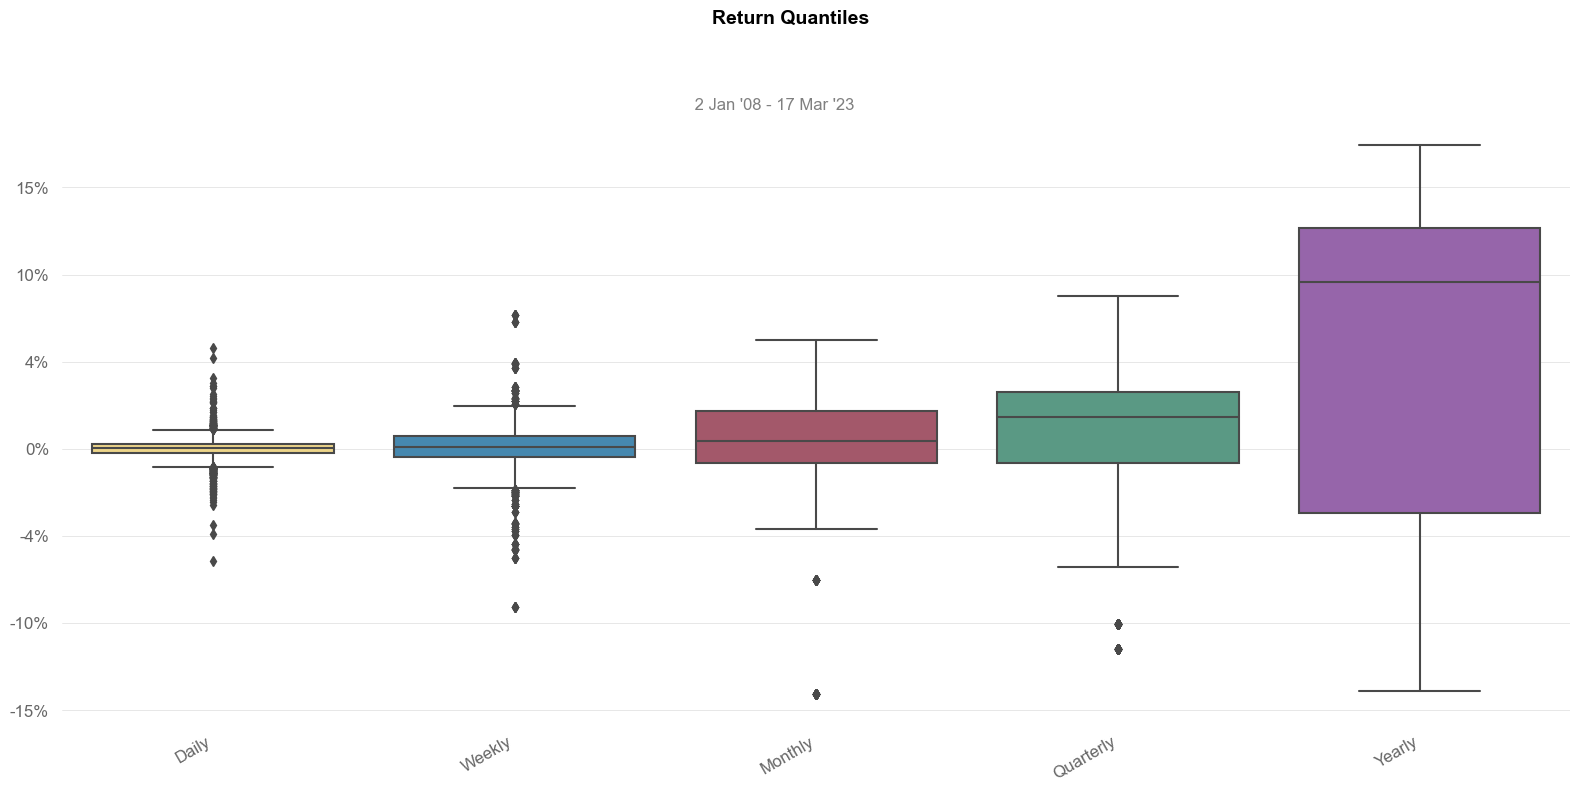

In [3]:
# Set timeframe
start_date = "2008-01-01"
end_date = "2023-03-20"

# Define your current portfolio and target weights for each stock
current_portfolio = {'TIP': 0.20, #TIPS Bond
                     'ZB=F': 0.10, #20-30 Year Treasure Bond
                     'BND' : 0.10, #5-10 Intermediate Bond
                     'XLU' : 0.10, #Utilities Select Sector
                     'XLP' : 0.10, #Consumer Staples Select Sector
                     'XLV' : 0.10, #Health Care Select Sector
                     'XLI' : 0.10, #Industrial Select Sector
                     'GLD' : 0.10, #Gold Shares 
                     'VNQ' : 0.10, #Real Estate Index Fund
                     'SHEL' : 0.00, #Shell Oil
                    }
                     
target_weights_earlymonth = {'TIP': 0.10, #TIPS Bond
                             'ZB=F': 0.05, #20-30 Year Treasure Bond
                             'BND' : 0.05, #5-10 Intermediate Bond
                             'XLU' : 0.14, #Utilities Select Sector
                             'XLP' : 0.14, #Consumer Staples Select Sector
                             'XLV' : 0.13, #Health Care Select Sector
                             'XLI' : 0.13, #Industrial Select Sector
                             'GLD' : 0.13, #Gold Shares 
                             'VNQ' : 0.13, #Real Estate Index Fund
                             'SHEL' : 0.00 #Shell Oil
                            }

halloween_effect_weights = {'TIP': 0.16, #TIPS Bond
                            'ZB=F': 0.07, #20-30 Year Treasure Bond
                            'BND' : 0.07, #5-10 Intermediate Bond
                            'XLU' : 0.12, #Utilities Select Sector
                            'XLP' : 0.12, #Consumer Staples Select Sector
                            'XLV' : 0.12, #Health Care Select Sector
                            'XLI' : 0.12, #Industrial Select Sector
                            'GLD' : 0.11, #Gold Shares 
                            'VNQ' : 0.11, #Real Estate Index Fund
                            'SHEL' : 0.00, #Shell Oil
                            }

drawdown_weights = {'TIP': 0.50, #TIPS Bond
                    'ZB=F': 0.22, #20-30 Year Treasure Bond
                    'BND' : 0.22, #5-10 Intermediate Bond
                    'XLU' : 0.01, #Utilities Select Sector
                    'XLP' : 0.01, #Consumer Staples Select Sector
                    'XLV' : 0.01, #Health Care Select Sector
                    'XLI' : 0.01, #Industrial Select Sector
                    'GLD' : 0.01, #Gold Shares 
                    'VNQ' : 0.01, #Real Estate Index Fund
                    'SHEL' : 0.00, #Shell Oil 
                    }

oil_weights = {'TIP': 0.10, #TIPS Bond
               'ZB=F': 0.10, #20-30 Year Treasure Bond
               'BND' : 0.10, #5-10 Intermediate Bond
               'XLU' : 0.10, #Utilities Select Sector
               'XLP' : 0.10, #Consumer Staples Select Sector
               'XLV' : 0.10, #Health Care Select Sector
               'XLI' : 0.10, #Industrial Select Sector
               'GLD' : 0.10, #Gold Shares 
               'VNQ' : 0.10, #Real Estate Index Fund
               'SHEL' : 0.10, #Shell Oil
              }

target_weights_oilearlymonth = {'TIP': 0.10, #TIPS Bond
                                'ZB=F': 0.05, #20-30 Year Treasure Bond
                                'BND' : 0.05, #5-10 Intermediate Bond
                                'XLU' : 0.11, #Utilities Select Sector
                                'XLP' : 0.11, #Consumer Staples Select Sector
                                'XLV' : 0.11, #Health Care Select Sector
                                'XLI' : 0.11, #Industrial Select Sector
                                'GLD' : 0.11, #Gold Shares 
                                'VNQ' : 0.12, #Real Estate Index Fund
                                'SHEL' : 0.13, #Shell Oil
                                }

# Define Functions
def isFirstWeek(row_datetime):
    dt = datetime.strptime(str(row_datetime), '%Y-%m-%d %H:%M:%S')
    return dt.day in range(1, 7)

def isHalloween(row_datetime):
    dt = datetime.strptime(str(row_datetime), '%Y-%m-%d %H:%M:%S')
    if dt.month in range(10,12):
        return True
    elif dt.month in range(1,3):
        return True
    else:
        return False

def isOil(row_datetime):
    dt = datetime.strptime(str(row_datetime), '%Y-%m-%d %H:%M:%S')
    if dt.month in range(5,7):
        return True
    else:
        return False

def earlyMonthWeights(df):
    index = 0
    for time in df.index:
        if isFirstWeek(time) == True and isOil(time) == True:
            for col in df:
                if isinstance(df[col][index], list):
                    df[col][index] = [df[col][index][0], df[col][index][1], target_weights_oilearlymonth[col]]
        elif isFirstWeek(time) == True and isOil(time) == False:
            for col in df:
                if isinstance(df[col][index], list):
                    df[col][index] = [df[col][index][0], df[col][index][1], target_weights_earlymonth[col]]
        index = index+1
    return df

def halloweenWeights(df):
    index = 0
    for time in df.index:
        if isHalloween(time) == True:
            for col in df:
                if isinstance(df[col][index], list):
                    df[col][index] = [df[col][index][0], df[col][index][1], halloween_effect_weights[col]]
        index = index+1
    return df

def oilWeights(df):
    index = 0
    for time in df.index:
        if isOil(time) == True:
            for col in df:
                if isinstance(df[col][index], list):
                    df[col][index] = [df[col][index][0], df[col][index][1], oil_weights[col]]
        index = index+1
    return df

def matchingDateIndividual(date1, date2):
    interval_length = timedelta(days=60)
    matching_dates = set()
    delta = date2 - date1
    if 0 <= delta.days <= interval_length.days:
        return True
    else:
        return False
    
def drawdownWeights(df, dates):
    index = 0
    for time in df.index:
        for ddPeriod in dates:
            if matchingDateIndividual(time, ddPeriod) == True:
                for col in df:
                    if isinstance(df[col][index], list):
                        df[col][index] = [df[col][index][0], df[col][index][1], drawdown_weights[col]]
        index = index+1
    return df

def calculateReturn(df, i, portfolio):
    df['Return'] = df['Close'].pct_change().fillna(0)
    df['Weight'] = portfolio[i]
    df['Combine'] = df[['Close', 'Return', 'Weight']].values.tolist()
    return df

def calculateReturnBenchmark(df):
    df['Return'] = df['Close'].pct_change().fillna(0)
    return df

def downloadData(download):
    x = yf.download(download, start=start_date, end=end_date)
    return x

def downloadAll(current_portfolio):
    dfCollection = {}
    for i in current_portfolio:
        dfCollection[i] = downloadData(i)
    return dfCollection

def createDataframePrice(portfolio, df):
    fund = pd.DataFrame(index=df[list(portfolio.items())[0][0]].index)
    count = 0
    for i in portfolio:
        if count == 0:
            fund[i] = df[i]['Close']
            count = 1
        else:
            fund = fund.join(df[i]['Close'], rsuffix=i)
    for i, col in zip(portfolio, fund.columns):
        fund = fund.rename(columns={col: str(i)})
    fund.fillna(0, inplace=True)
    return fund

def createDataframeCombine(portfolio, df):
    fund = pd.DataFrame(index=df[list(portfolio.items())[0][0]].index)
    count = 0
    for i in portfolio:
        if count == 0:
            fund[i] = df[i]['Combine']
            count = 1
        else:
            fund = fund.join(df[i]['Combine'], rsuffix=i)
    for i, col in zip(portfolio, fund.columns):
        fund = fund.rename(columns={col: str(i)})
    return fund

def calculateTotalReturn(df):
    row_sums = df.apply(lambda x: sum([i[1] * i[2] if isinstance(i, list) else 0 for i in x]), axis=1)
    return row_sums

def macroFactorModel(CPI, GDP, TB, UE):
    #Find changes in trend in time series data
    def trendChange(data, dataTotal):
        window_size = 5
        moving_avg = data.rolling(window_size).mean()
        diff = data - moving_avg
        threshold = 0.5
        trend_changes = []
        for i in range(1, len(diff)):
            if np.sign(diff[i]) != np.sign(diff[i-1]) and abs(diff[i]) > threshold:
                trend_changes.append(dataTotal.index[i])

        return trend_changes
    
    #Find Matching Dates between two arrays
    def matchingDate(date1s, date2s):
        interval_length = timedelta(days=60)
        matching_dates = set()
        for date1 in date1s:
            for date2 in date2s:
                delta = date2 - date1
                if 0 <= delta.days <= interval_length.days:
                    matching_dates.add(date1)
        return matching_dates
    
    CPI['DATE'] = pd.to_datetime(CPI['DATE'])
    CPI.set_index('DATE', inplace=True)
    GDP['DATE'] = pd.to_datetime(GDP['DATE'])
    GDP.set_index('DATE', inplace=True)
    TB['DATE'] = pd.to_datetime(TB['DATE'])
    TB.set_index('DATE', inplace=True)
    UE['DATE'] = pd.to_datetime(UE['DATE'])
    UE.set_index('DATE', inplace=True)
    
    #Merge Macro Indicators with SPY Dataset
    pCPI = pd.merge(CPI, SPYTest, left_index=True, right_index=True)
    pGDP = pd.merge(GDP, SPYTest, left_index=True, right_index=True)
    pTB = pd.merge(TB, SPYTest, left_index=True, right_index=True)
    pUE = pd.merge(UE, SPYTest, left_index=True, right_index=True)
    #Calculate Pearson Correlation
    corrCPI = np.corrcoef(pCPI['MEDCPIM158SFRBCLE'], pCPI['Close'])[0, 1]
    corrGDP = np.corrcoef(pGDP['GDP'], pGDP['Close'])[0, 1]
    corrTB = np.corrcoef(pTB['BOPGSTB'], pTB['Close'])[0, 1]
    corrUE = np.corrcoef(pUE['UNRATE'], pUE['Close'])[0, 1]
    #Calculate Tau Correlation
    tauCPI, p_valueCPI = kendalltau(pCPI['MEDCPIM158SFRBCLE'], pCPI['Close'])
    tauGDP, p_valueGDP = kendalltau(pGDP['GDP'], pGDP['Close'])
    tauTB, p_valueTB = kendalltau(pTB['BOPGSTB'], pTB['Close'])
    tauUE, p_valueUE = kendalltau(pUE['UNRATE'], pUE['Close'])
    
    #Calculate change in trends
    GDPChange = trendChange(pGDP['GDP'], pGDP)
    UEChange = trendChange(pUE['UNRATE'], pUE)
    TBChange = trendChange(pTB['BOPGSTB'], pTB)
    CPIChange = trendChange(pCPI['MEDCPIM158SFRBCLE'], pCPI)
    totalChange = [TBChange, CPIChange, UEChange, GDPChange]
    
    #Total Set of dates that overlap
    equivalence = []
    for i in range(len(totalChange)):
        for j in range(i+1, len(totalChange)):
            for x in matchingDate(totalChange[i], totalChange[j]):
                equivalence.append(x)
                
    drawdownDates = sorted(list(set(equivalence)))
    
    return drawdownDates, corrCPI, corrGDP, corrTB, corrUE, tauCPI, tauGDP, tauTB, tauUE

#Benchmark SPY
SPY = downloadData('SPY')
calculateReturnBenchmark(SPY)
benchmark = SPY['Return']
benchmark.index = benchmark.index.tz_localize(None)
SPYTest = SPY.copy()

#Get MacroIndicated Drawdown Periods
CPI = pd.read_csv('MEDCPIM.csv')
GDP = pd.read_csv('GDP.csv')
TB = pd.read_csv('TRADEBALANCE.csv')
UE = pd.read_csv('UNRATE.csv')
macroValues = macroFactorModel(CPI, GDP, TB, UE)   
drawdownDates = macroValues[0]
print('-------------------------------------------------------------------------------------------------')
print(drawdownDates)
print('-------------------------------------------------------------------------------------------------')

#Benchmark Ray Dalio AWF
allWeatherFund_portfolio = {'VTI': 0.30,
                            'TLT': 0.40,
                            'IEI': 0.15,
                            'GLD': 0.075,
                            'GSG': 0.074,
                           }
AWF = downloadAll(allWeatherFund_portfolio)
for i in allWeatherFund_portfolio:
    calculateReturn(AWF[i], i, allWeatherFund_portfolio)
awfPrice = createDataframePrice(allWeatherFund_portfolio, AWF)
awfCombine = createDataframeCombine(allWeatherFund_portfolio, AWF)
AWFReturn = calculateTotalReturn(awfCombine)

#Download Data and Calculate Return        
dfCollection = downloadAll(current_portfolio)
for i in current_portfolio:
    calculateReturn(dfCollection[i], i, current_portfolio)

#Create dataframe that holds [Price, Return] as values in each Column("Stock Name")
fundPrice = createDataframePrice(current_portfolio, dfCollection)
fundCombine = createDataframeCombine(current_portfolio, dfCollection)

#Assign early month weights
fundCombine = fundCombine.fillna(0)
fundCombine = halloweenWeights(fundCombine)
fundCombine = oilWeights(fundCombine)
fundCombine = earlyMonthWeights(fundCombine)
fundCombine = drawdownWeights(fundCombine, drawdownDates)

#Calculate total return
MF = calculateTotalReturn(fundCombine)
print('-------------------------------------------------------------------------------------------------')
print(MF)
print('-------------------------------------------------------------------------------------------------')

#QuantStat
qs.plots.snapshot(MF, figsize=(16, 8))
qs.reports.full(MF, benchmark, figsize=(16, 8))

In [4]:
fundCombine.head(50)

,TIP,ZB=F,BND,XLU,XLP,XLV,XLI,GLD,VNQ,SHEL
Date,,,,,,,,,,
2008-01-02,"[106.63999938964844, 0.0, 0.1]","[117.90625, 0.0, 0.05]","[77.36000061035156, 0.0, 0.05]","[42.09000015258789, 0.0, 0.14]","[28.389999389648438, 0.0, 0.14]","[34.939998626708984, 0.0, 0.13]","[38.5099983215332, 0.0, 0.13]","[84.86000061035156, 0.0, 0.13]","[61.27000045776367, 0.0, 0.13]","[84.06999969482422, 0.0, 0.0]"
2008-01-03,"[107.0, 0.0033758497037885693, 0.1]","[117.75, -0.0013252054068381147, 0.05]","[77.45999908447266, 0.0012926379696500678, 0.05]","[42.029998779296875, -0.001425549372142898, 0.14]","[28.239999771118164, -0.0052835372227928445, 0...","[35.150001525878906, 0.006010386589122341, 0.13]","[38.540000915527344, 0.0007790858297016534, 0.13]","[85.56999969482422, 0.008366710810346678, 0.13]","[59.36000061035156, -0.031173491645862805, 0.13]","[85.87000274658203, 0.021410765532197784, 0.0]"
2008-01-04,"[106.97000122070312, -0.0002803624233352897, 0.1]","[118.09375, 0.0029193205944797462, 0.05]","[77.55000305175781, 0.0011619412386902894, 0.05]","[42.349998474121094, 0.007613602286894228, 0.14]","[28.1200008392334, -0.004249253996364777, 0.14]","[34.790000915527344, -0.010241837687731348, 0.13]","[37.75, -0.020498206973551536, 0.13]","[85.12999725341797, -0.005142017564280343, 0.13]","[56.95000076293945, -0.040599727470215674, 0.13]","[84.12999725341797, -0.020263251863390952, 0.0]"
2008-01-07,"[106.94999694824219, -0.00018700824747741596, ...","[118.40625, 0.002646202699126743, 0.07]","[77.56999969482422, 0.0002578548327465402, 0.07]","[43.22999954223633, 0.020779246749040192, 0.12]","[28.450000762939453, 0.011735416566760248, 0.12]","[35.47999954223633, 0.01983324543119025, 0.12]","[37.279998779296875, -0.012450363462334413, 0.12]","[84.7699966430664, -0.004228833806723897, 0.11]","[57.47999954223633, 0.009306387571495378, 0.11]","[86.19999694824219, 0.024604775495105757, 0.0]"
2008-01-08,"[107.02999877929688, 0.0007480302322346866, 0.16]","[118.28125, -0.0010556875164950963, 0.07]","[77.6500015258789, 0.0010313501530156977, 0.07]","[43.2400016784668, 0.0002313702599208156, 0.12]","[28.239999771118164, -0.007381405489972681, 0.12]","[35.77000045776367, 0.008173644849744699, 0.12]","[36.45000076293945, -0.022263896017570506, 0.12]","[86.77999877929688, 0.023711244730771908, 0.11]","[55.4900016784668, -0.03462070075883139, 0.11]","[83.0999984741211, -0.035962860601752134, 0.0]"
2008-01-09,"[106.94999694824219, -0.0007474711012531721, 0...","[118.8125, 0.004491413474240424, 0.07]","[77.55999755859375, -0.0011590980749067725, 0.07]","[43.709999084472656, 0.010869504804851049, 0.12]","[28.6200008392334, 0.013456128583395843, 0.12]","[36.40999984741211, 0.0178920710499888, 0.12]","[36.560001373291016, 0.0030178493291941333, 0.12]","[86.55000305175781, -0.0026503310759889986, 0.11]","[56.470001220703125, 0.017660831007266342, 0.11]","[84.25, 0.013838767111855388, 0.0]"
2008-01-10,"[106.47000122070312, -0.0044880387212292705, 0...","[117.4375, -0.011572856391372954, 0.07]","[77.52999877929688, -0.0003867815915570283, 0.07]","[43.439998626708984, -0.0061770867860664325, 0...","[28.670000076293945, 0.0017470033401258966, 0.12]","[36.36000061035156, -0.001373228159024631, 0.12]","[37.06999969482422, 0.01394962533852051, 0.12]","[88.25, 0.019641789581746893, 0.11]","[57.34000015258789, 0.01540639123566745, 0.11]","[83.36000061035156, -0.010563790975055665, 0.0]"
2008-01-11,"[107.26000213623047, 0.0074199390107054786, 0.16]","[118.25, 0.006918573709419951, 0.07]","[77.7699966430664, 0.003095548401241821, 0.07]","[43.43000030517578, -0.00023016394680674956, 0...","[28.270000457763672, -0.01395185271942212, 0.12]","[36.470001220703125, 0.003025319265815618, 0.12]","[36.439998626708984, -0.016994903515016646, 0.12]","[88.58000183105469, 0.003739397519033183, 0.11]","[57.349998474121094, 0.00017436905313217288, 0...","[81.5999984741211, -0.021113269233972498, 0.0]"
2008-01-14,"[107.70999908447266, 0.004195384479581232, 0.16]","[118.5, 0.0021141649048626032,